In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


data_path = '/local/sven/v0_project_archive/spec_plx_dr17_kin_output_new_solar6d_all_AP.fits'
from astropy.table import Table
dat = Table.read(data_path, format='fits')
df = dat.to_pandas()

In [11]:
for col in df.columns:
    print(col)

Etot
JR
Jphi
Jz
KE
Lx
Ly
Lz
PE
U
V
W
XGC
YGC
ZGC
apo
cov_UV
cov_UW
cov_VW
cov_vphiz
cov_vrphi
cov_vrz
e_Etot
e_JR
e_Jphi
e_Jz
e_KE
e_Lx
e_Ly
e_Lz
e_PE
e_U
e_V
e_W
e_XGC
e_YGC
e_ZGC
e_apo
e_ecc
e_peri
e_vphi
e_vr
e_vz
e_zmax
ecc
f_v_forder
peri
source_id
vphi
vr
vz
zmax
GAIAEDR3_SOURCE_ID_x
APOGEE_ID
spec_parallax
spec_parallax_err
ra_g3
dec_g3
l_g3
b_g3
pmra_pmdec_corr
RGC
phiGC
e_RGC
TELESCOPE
FIELD
ALT_ID
RA
DEC
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
AK_TARG
AK_TARG_METHOD
AK_WISE
SFD_EBV
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
APOGEE2_TARGET4
TARGFLAGS
SURVEY
PROGRAMNAME
NVISITS
SNR
SNREV
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
N_COMPONENTS
MEANFIB
SIGFIB
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID_y
GAIAEDR3_PARALLAX
GAIAEDR3_PARALLAX_ERROR
GAIAEDR3_PMRA
GAIAEDR3_PMRA_ERROR
GAIAEDR3_PMDEC
GAIAEDR3_PMDEC_ERROR
GAIAEDR3_PHOT_G_MEAN_MAG
GAIAEDR3_PHOT_BP_

In [3]:
v0_data_path = '/local/sven/v0_project_archive/GaiaDR3_RV_RGB_fidelity.csv'
v0_data = pd.read_csv(v0_data_path, nrows=100)
v0_data.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'rgeo', 'b_rgeo', 'B_rgeo',
       'r_est', 'b_rpgeo', 'B_rpgeo', 'ra_error', 'dec_error', 'parallax',
       'parallax_error', 'PM', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'radial_velocity',
       'radial_velocity_error', 'Vbroad', 'GRVSmag', 'Gal', 'Teff', 'logg',
       '[Fe/H]', 'Dist', 'A0', 'RAJ2000', 'DEJ2000', 'e_RAJ2000', 'e_DEJ2000',
       'RADEcorJ2000', 'ra_dec_corr', 'ra_pmdec_corr', 'ra_parallax_corr',
       'ra_pmra_corr', 'B_Teff', 'b_Teff', 'b_logg', 'B_logg', 'b_Dist',
       'B_Dist', 'b_AG', 'B_AG', 'b_A0', 'B_A0', 'dec_pmra_corr',
       'dec_pmdec_corr', 'dec_parallax_corr', 'parallax_pmdec_corr',
       'parallax_pmra_corr', 'pmra_pmdec_corr'],
      dtype='object')

# Query Archive

In [5]:
from astroquery.gaia import Gaia
from astropy.table import Table

In [9]:
type(df[['source_id']])

pandas.core.frame.DataFrame

In [10]:
up_table = Table.from_pandas(df[['source_id']])

In [25]:
Gaia.login()

job = Gaia.upload_table(up_table, table_name='ou_sample', verbose=True)

INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
Sending pytable.
200 200
[('Date', 'Wed, 03 Jan 2024 10:27:53 GMT'), ('Server', 'Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips mod_jk/1.2.43'), ('Cache-Control', 'no-cache, no-store, max-age=0, must-revalidate'), ('Pragma', 'no-cache'), ('Expires', '0'), ('X-XSS-Protection', '1; mode=block'), ('X-Frame-Options', 'SAMEORIGIN'), ('X-Content-Type-Options', 'nosniff'), ('Transfer-Encoding', 'chunked'), ('Content-Type', 'text/plain;charset=ISO-8859-1')]
Uploaded table 'ou_sample'.


In [36]:
query_string = 'SELECT TOP 200000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.ra_dec_corr,gaia_source.ra_parallax_corr,gaia_source.ra_pmra_corr,gaia_source.ra_pmdec_corr,gaia_source.dec_parallax_corr,gaia_source.dec_pmra_corr,gaia_source.dec_pmdec_corr,gaia_source.parallax_pmra_corr,gaia_source.parallax_pmdec_corr,gaia_source.pmra_pmdec_corr, gaia_source.ruwe,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_mag,gaia_source.radial_velocity,gaia_source.radial_velocity_error,gaia_source.phot_variable_flag FROM gaiadr3.gaia_source as gaia_source, user_spoder.ou_sample as s WHERE gaia_source.source_id = s.source_id'

In [37]:
Gaia.login()

job_name = 'gaia_ou_test'
outpath = '/scratch/local/sven/gaia_ou_data.csv'

job = Gaia.launch_job_async(query_string,
                            name=job_name,
                            output_file=outpath,
                            output_format='csv', 
                            dump_to_file=True, 
                            verbose=True)
results = job.get_results()

INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
Launched query: 'SELECT TOP 200000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error,gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.ra_dec_corr,gaia_source.ra_parallax_corr,gaia_source.ra_pmra_corr,gaia_source.ra_pmdec_corr,gaia_source.dec_parallax_corr,gaia_source.dec_pmra_corr,gaia_source.dec_pmdec_corr,gaia_source.parallax_pmra_corr,gaia_source.parallax_pmdec_corr,gaia_source.pmra_pmdec_corr, gaia_source.ruwe,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_mag,gaia_source.radial_velocity,gaia_source.radial_velocity_error,gaia_source.phot_variable_flag FROM gaiadr3.gaia_source as gaia_source, user_spoder.ou_sample as s WHERE gaia_source.source_id = s.source_id'
------>https
host = gea.esac.esa.int:4

# Check data

In [193]:
path = '/scratch/local/sven/gaia_ou_data.csv'
gaia_ou_data = pd.read_csv(path)


gaia_ou_data['r_est'] = 1/df.spec_parallax*1e3
gaia_ou_data['r_est_error'] = ((1/(df.spec_parallax-df.spec_parallax_err) - 1/(df.spec_parallax+df.spec_parallax_err))/2)*1e3 


#gaia_ou_data = gaia_ou_data[gaia_ou_data.parallax/gaia_ou_data.parallax_error > 10]
print(gaia_ou_data.shape)

(120309, 30)


In [159]:
gaia_ou_data[['radial_velocity', 'source_id']]

,radial_velocity,source_id
0,-52.478863,538028216707715712
1,-82.230064,422737314373993984
2,-33.695934,429530195985183744
3,NaN,4701763512829847808
4,NaN,431771039351005184
...,...,...
120304,-129.981540,2016199730570963968
120305,-58.779945,2013020767578111360
120306,NaN,6380099464951165952
120307,-33.941452,2282127264957087872


In [6]:
df[['GAIAEDR3_DR2_RADIAL_VELOCITY', 'source_id']]

,GAIAEDR3_DR2_RADIAL_VELOCITY,source_id
0,-5.192470e+01,538028216707715712
1,-8.242390e+01,422737314373993984
2,-3.326460e+01,429530195985183744
3,1.000000e+20,4701763512829847808
4,1.000000e+20,431771039351005184
...,...,...
120304,1.000000e+20,2016199730570963968
120305,-5.910300e+01,2013020767578111360
120306,1.000000e+20,6380099464951165952
120307,-3.369650e+01,2282127264957087872


In [5]:
df[['vr', 'source_id']]

,vr,source_id
0,28.930144,538028216707715712
1,-39.429575,422737314373993984
2,61.274230,429530195985183744
3,110.250236,4701763512829847808
4,-26.899745,431771039351005184
...,...,...
120304,-25.724774,2016199730570963968
120305,15.236614,2013020767578111360
120306,136.812359,6380099464951165952
120307,78.461883,2282127264957087872


(120309, 245)
(22810, 245)


(-0.5, 2.0)

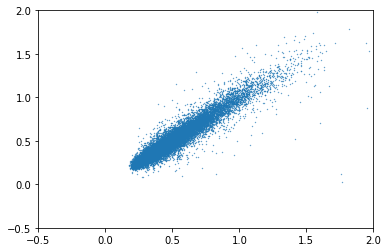

In [6]:

df_filtered = df[(df.LOGG > 0) & (df.LOGG < 2.2)]

print(df_filtered.shape)

df_filtered = df[df.GAIAEDR3_PARALLAX/df.GAIAEDR3_PARALLAX_ERROR > 20]
print(df_filtered.shape)
x = df_filtered.GAIAEDR3_PARALLAX
y = df_filtered.spec_parallax

plt.scatter(x, y, s=0.1)
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)

In [22]:
df.GAIAEDR3_R_MED_PHOTOGEO

0          3268.601074
1          2599.153320
2          2590.079102
3          8396.721680
4          5146.033691
              ...     
120304     4210.976562
120305     3450.244873
120306    19485.673828
120307     2276.260986
120308    10558.042969
Name: GAIAEDR3_R_MED_PHOTOGEO, Length: 120309, dtype: float32

(46382, 245)


(0.0, 10000.0)

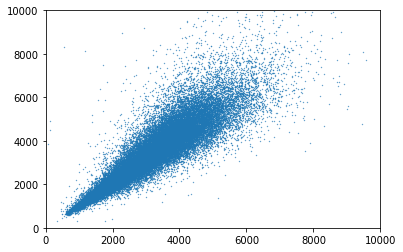

In [47]:
df_filtered = df[df.GAIAEDR3_PARALLAX/df.GAIAEDR3_PARALLAX_ERROR > 10]


x = df_filtered.GAIAEDR3_R_MED_PHOTOGEO
y = 1/df_filtered.spec_parallax*1e3

print(df_filtered.shape)

plt.scatter(x, y, s=0.1)
plt.xlim(0, 1e4)
plt.ylim(0, 1e4)

(46382, 29)


In [194]:
gaia_data_in = gaia_ou_data[['source_id', 'ra', 'dec', 'r_est', 'pmra', 'pmdec', 'radial_velocity']]
gaia_data_in.columns

Index(['source_id', 'ra', 'dec', 'r_est', 'pmra', 'pmdec', 'radial_velocity'], dtype='object')

In [234]:
import sys
sys.path.append("../../gaia_tools/")
sys.path.append("../../scripts/")
from covariance_generation import generate_galactocentric_covmat, transform_cov_cylindirical
import covariance_generation
from mcmc_plots import *
import data_analysis
import transformation_constants
import helper_functions as helpfunc
import numpy as np

import transformation_functions

r_0 = 8178
z_0 = 20.8
v_sun = np.array([[5.1], 
                  [247.3], 
                  [7.8]])

galcen_data = transformation_functions.get_transformed_data(gaia_data_in,
                        include_cylindrical = True,
                        z_0 = z_0,
                        r_0 = r_0,
                        v_sun = v_sun,
                        is_bayes = True,
                        is_output_frame = False,
                        is_source_included = False)

source_id = np.array([gaia_ou_data.source_id], dtype=np.int64).T
print(type(source_id[0,0]))
#galcen_data = np.concatenate(([galcen_data, source_id.T]), axis=1)
#galcen_data['source_id'] = gaia_ou_data.source_id

<class 'numpy.int64'>


In [163]:
# Check if source IDs are NaN anywhere
np.where(np.array(galcen_data[:, -1]) == np.nan)

(array([], dtype=int64),)

In [164]:
print(galcen_data.source_id)
print(gaia_ou_data.source_id)

AttributeError: 'numpy.ndarray' object has no attribute 'source_id'

In [165]:
print(type(source_id[0,0]))

<class 'numpy.int64'>


In [235]:
r_filter = np.where(galcen_data[:,6] > 6000)
galcen_data = galcen_data[r_filter]
source_id = source_id[r_filter]

In [236]:
wedge_filter = np.where(np.abs(galcen_data[:,2])/galcen_data[:,6] < np.tan(np.pi/30))
wedge_filter = np.where(np.abs(galcen_data[:,2]) < 1000)
galcen_data = galcen_data[wedge_filter]
source_id = source_id[wedge_filter]

In [237]:
velocity_filter = np.where(np.abs(galcen_data[:,5]) < 100)
galcen_data = galcen_data[velocity_filter]
source_id = source_id[velocity_filter]

In [238]:
angle_1 = np.deg2rad(150)  # 150 degrees in radians (180 - 30)
angle_2 = np.deg2rad(210)  # 210 degrees in radians (180 + 30)

# Slopes of the lines (tan of the angles)
slope_1 = np.tan(angle_1)
slope_2 = np.tan(angle_2)

slope_filter = np.where((galcen_data[:, 1] <= slope_1 * galcen_data[:, 0]) & (galcen_data[:, 1] >= slope_2 * galcen_data[:,0]))
galcen_data = galcen_data[slope_filter]
source_id = source_id[slope_filter]

In [170]:
galcen_data.shape

(33919, 10)

25191.478452255113

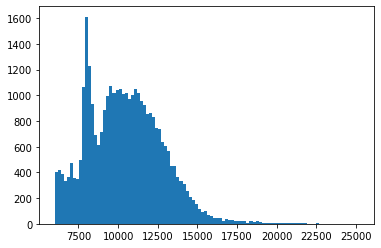

In [239]:
# R distribution
plt.hist(galcen_data[:,6], 100)
np.max(galcen_data[:,6])

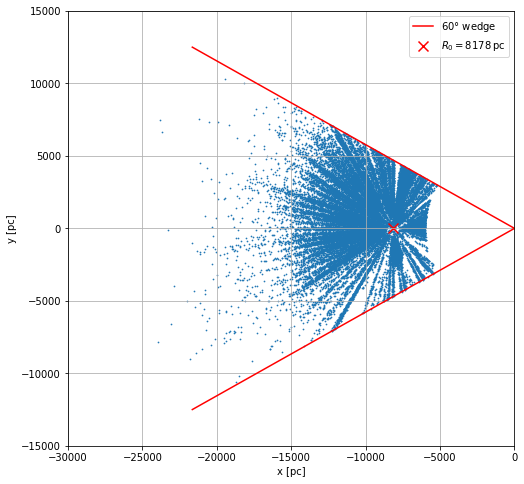

In [200]:
fig=plt.figure(figsize=(8,8))

plt.scatter(galcen_data[:,0], galcen_data[:,1],s=0.5)

angle_1 = np.deg2rad(150)  # 150 degrees in radians (180 - 30)
angle_2 = np.deg2rad(210)  # 210 degrees in radians (180 + 30)

line_length = 25000

# Calculating the end points of the lines for the new angles
end_x1, end_y1 = line_length * np.cos(angle_1), line_length * np.sin(angle_1)
end_x2, end_y2 = line_length * np.cos(angle_2), line_length * np.sin(angle_2)

plt.plot([0, end_x1], [0, end_y1], color='red', label=r'$60 \degree$ wedge')
plt.plot([0, end_x2], [0, end_y2], color='red')


plt.ylim(-15000, 15000)
plt.xlim(-3e4, 0)


plt.xlabel('x [pc]')
plt.ylabel('y [pc]')

plt.grid()
plt.scatter(0,0,s=1)
plt.scatter(-8178, 0, marker='x', color='red', s=100, label=r'$R_0 = 8178 \rm \, pc$') 

plt.legend()

In [240]:
# Let's check how many stars in this sample have DR3 radial velocities.
columns = ['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'r', 'phi', 'v_r', 'v_phi']
galcen_data = pd.DataFrame(galcen_data, columns=columns)
galcen_data['source_id'] = source_id


In [229]:
galcen_data.shape

(33919, 11)

In [143]:
source_id.shape

(33919, 1)

In [173]:
# Check if source IDs are NaN anywhere
np.where(galcen_data.source_id == np.nan)

(array([], dtype=int64),)

In [202]:
gaia_ou_data[gaia_ou_data['source_id'].isin(galcen_data['source_id'])]


,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,pmra_pmdec_corr,ruwe,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,radial_velocity_error,phot_variable_flag,r_est,r_est_error
0,538028216707715712,0.000205,0.017419,74.285436,0.015699,0.285442,0.019475,0.048582,0.024032,0.522248,...,-0.073327,1.016402,11.698828,13.272248,10.495563,-52.478863,0.194892,NOT_AVAILABLE,3366.324654,268.680955
1,422737314373993984,0.013215,0.013343,58.360640,0.013436,0.359852,0.019698,-4.353479,0.020771,-1.259435,...,-0.207853,1.027965,11.143223,12.461564,10.027846,-82.230064,0.190938,NOT_AVAILABLE,2218.522428,166.209492
2,429530195985183744,0.022831,0.011660,61.869629,0.010069,0.365394,0.015404,1.995410,0.014309,1.353053,...,-0.269784,0.878729,11.660726,12.833045,10.603519,-33.695934,0.240525,NOT_AVAILABLE,2941.239298,184.666593
5,420513826985325696,0.062220,0.010380,55.579060,0.010034,0.250919,0.014998,0.024889,0.014502,-1.044799,...,-0.356075,1.141255,12.898564,13.934713,11.898685,-54.509174,0.399205,NOT_AVAILABLE,5215.786781,296.489983
7,429941795599771136,0.071657,0.013079,62.359014,0.014343,0.137760,0.017171,-1.705245,0.018287,-0.478869,...,-0.300556,0.990860,14.301030,16.053486,13.054741,-95.054430,1.143728,NOT_AVAILABLE,7345.948110,434.423018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120301,1995077008382180352,359.978521,0.012656,57.191339,0.013421,0.096560,0.019193,-2.031952,0.017381,-1.740929,...,-0.341784,1.210147,12.949261,14.213318,11.849603,-89.932280,0.288170,NOT_AVAILABLE,7044.690718,224.973532
120303,2016468767318259712,359.980717,0.015719,64.715594,0.013035,0.178242,0.017860,-2.626906,0.022191,1.273752,...,-0.167447,1.094765,14.231042,16.047014,12.963837,-46.700970,1.364495,NOT_AVAILABLE,5245.523040,257.908378
120304,2016199730570963968,359.981316,0.023401,64.049225,0.023106,0.203817,0.029635,-1.676314,0.031024,0.131214,...,-0.327201,1.013284,15.745505,17.341608,14.536809,-129.981540,3.498075,NOT_AVAILABLE,6156.606355,384.936252
120305,2013020767578111360,359.983672,0.010355,62.853389,0.010937,0.250876,0.013786,-1.252002,0.013391,-1.450979,...,-0.301147,1.004389,13.510835,14.607828,12.485116,-58.779945,0.665587,NOT_AVAILABLE,3918.339230,231.322373


In [203]:
icrs_data = gaia_ou_data.merge(galcen_data, on='source_id')[gaia_ou_data.columns]

In [150]:
icrs_data.shape

(33919, 29)

In [205]:
# Check if radial velocities are NaN anywhere
np.where(np.array(icrs_data.radial_velocity) == np.nan)

(array([], dtype=int64),)

(array([2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 5.000e+00,
        1.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 8.000e+00,
        3.000e+00, 8.000e+00, 1.100e+01, 1.500e+01, 1.500e+01, 2.600e+01,
        4.000e+01, 5.500e+01, 8.500e+01, 1.230e+02, 2.070e+02, 2.730e+02,
        3.540e+02, 5.600e+02, 7.310e+02, 8.960e+02, 1.082e+03, 1.226e+03,
        1.374e+03, 1.528e+03, 1.690e+03, 1.671e+03, 1.785e+03, 1.737e+03,
        1.728e+03, 1.679e+03, 1.689e+03, 1.573e+03, 1.471e+03, 1.391e+03,
        1.294e+03, 1.185e+03, 1.012e+03, 9.100e+02, 8.450e+02, 7.880e+02,
        6.510e+02, 5.210e+02, 4.370e+02, 3.220e+02, 2.480e+02, 1.860e+02,
        1.420e+02, 8.900e+01, 5.100e+01, 4.100e+01, 1.700e+01, 1.000e+01,
        9.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 5.000e+00,
        7.000e+00, 7.000e+00, 1.400e+0

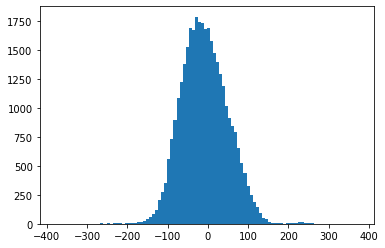

In [207]:
plt.hist(icrs_data.radial_velocity, 100)

In [190]:
icrs_data.columns

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'ruwe',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'radial_velocity', 'radial_velocity_error', 'phot_variable_flag',
       'r_est', 'r_est_error'],
      dtype='object')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.600e+01, 3.204e+03, 6.553e+03, 6.324e+03, 5.112e+03, 3.638e+03,
        2.659e+03, 1.805e+03, 1.256e+03, 8.820e+02, 6.450e+02, 4.590e+02,
        3.380e+02, 2.420e+02, 1.550e+02, 1.110e+02, 9.900e+01, 7.100e+01,
        6.000e+01, 3.100e+01, 2.900e+01, 3.700e+01, 2.100e+01, 2.000e+01,
        1.800e+01, 1.100e+01, 9.000e+00, 7.000e+00, 5.000e+00, 9.000e+00,
        7.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

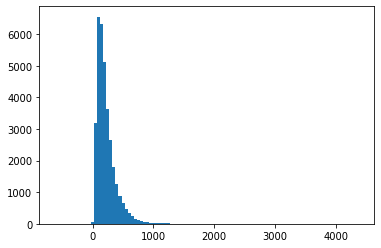

In [211]:
plt.hist(icrs_data.r_est_error, 100)

In [230]:
np.max(galcen_data.r)

25191.478452255113

In [209]:
icrs_data.to_csv('/scratch/local/sven/ou_icrs_sample.csv', index=False)

# Bin Collection Test

In [247]:
path = '/scratch/local/sven/ou_icrs_sample.csv'
gaia_ou_sample = pd.read_csv(path)

In [252]:
import sys
sys.path.append("../../gaia_tools/")
sys.path.append("../../scripts/")
from covariance_generation import generate_galactocentric_covmat, transform_cov_cylindirical
import covariance_generation
from mcmc_plots import *
import data_analysis
import transformation_constants
import helper_functions as helpfunc
import numpy as np

import transformation_functions

r_0 = 8500
z_0 = 20.8
v_sun = np.array([[5.1], 
                  [247.3], 
                  [7.8]])

galcen_data = transformation_functions.get_transformed_data(gaia_data_in,
                        include_cylindrical = True,
                        z_0 = z_0,
                        r_0 = r_0,
                        v_sun = v_sun,
                        is_bayes = True,
                        is_output_frame = False,
                        is_source_included = False)

source_id = np.array([gaia_ou_data.source_id], dtype=np.int64).T

columns = ['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'r', 'phi', 'v_r', 'v_phi']
galcen_data = pd.DataFrame(galcen_data, columns=columns)
galcen_data['source_id'] = source_id

In [253]:
r_min = 6000/8178
r_max = 25500/8178

bin_collection = data_analysis.get_collapsed_bins(data = galcen_data,
                                                         theta = r_0,
                                                         BL_r_min = r_min,
                                                         BL_r_max = r_max,
                                                         BL_z_min = -1000,
                                                         BL_z_max = 1000,
                                                         N_bins = (10, 1),
                                                         r_drift = True,
                                                         debug = True)

Binning data from galactocentric input data...
Max r value in DataFrame 476588.1079768559
Points drifted in r + direction 0
Points drifted in r - direction 120309
Time elapsed for binning data with collapsed bins: 0.08251550499699079 sec


In [254]:
for bin in bin_collection.bins:
    print(len(bin.data))

8648
13374
12850
8119
2534
637
283
129
34
14
